# Loan Data from Prosper : Communicate findings

### by Kristina

### Investigation Overview

The aim of my study was to examine the features of loans that could serve as predictors for the borrower APR. Specifically, I placed emphasis on variables such as the initial loan amount, the borrower's Prosper rating, credit grade, the loan duration, the borrower's monthly income as stated by them, their employment status, the term of the loan, their occupation and how it spread among different states.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataframe for analysis
clean_loan = pd.read_csv('./prosper_clean_loan.csv')

### Distribution of loan amount

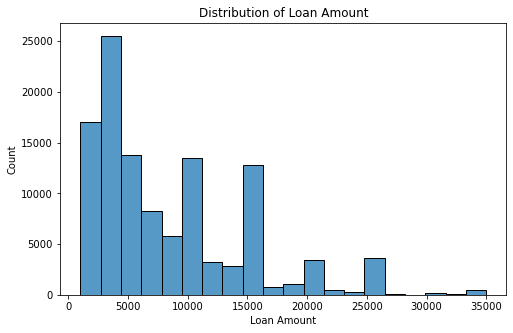

In [31]:
## plot the distribution of loan amount
plt.figure(figsize=[8, 5])
sb.histplot(data=clean_loan, x='LoanOriginalAmount', bins=20)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

Based on the observed frequency distribution, there appears to be distinct peaks at 5k, 10k, 15k, 20k, and 25k. This suggests that a majority of the loans were given in amounts that are multiples of 5,000 units.

### The dependence distribution between "Borrower APR" and "Loan Amount" in the Prosper loan dataset

Correlation coefficient: -0.3222944435577997


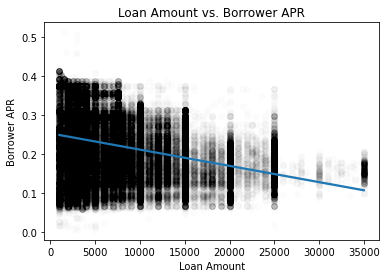

In [32]:
# Choose the two variables to explore
x_var = 'LoanOriginalAmount'
y_var = 'BorrowerAPR'

# Calculate the correlation coefficient
corr = clean_loan[x_var].corr(clean_loan[y_var])
print('Correlation coefficient:', corr)

# Create a regression line
sb.regplot(x=x_var, y=y_var, data=clean_loan, scatter_kws={'alpha':0.01, 'color': 'black'})
plt.title('Loan Amount vs. Borrower APR')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.show()

The plot and regression analysis indicate a statistically significant negative correlation between LoanOriginalAmount and BorrowerAPR. The observed trend supports the notion that smaller loans tend to have higher interest rates, which can be attributed to fixed costs associated with loan processing and origination. On the other hand, larger loans may have slightly lower interest rates due to the economies of scale that come with higher loan amounts. This finding has important implications for lenders and borrowers, as it suggests that loan size should be carefully considered when evaluating the cost-effectiveness of different loan products. Overall, the observed relationship between loan size and interest rates highlights the need for nuanced and data-driven approaches to loan pricing and risk assessment.

### the distribution of Credit Grade

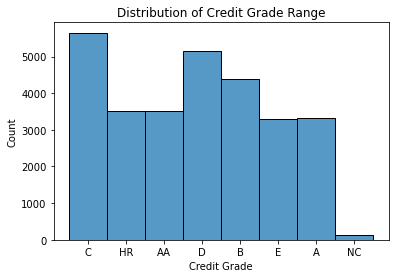

In [33]:
# plot the distribution of credit score range
sb.histplot(data=clean_loan, x="CreditGrade", binwidth=10)
plt.title("Distribution of Credit Grade Range")
plt.xlabel("Credit Grade")
plt.show()

Here we can mark 3 most destributed ranges as C, D, B and the least NC. It can be interpreted that most of the borrowers have average to above-average creditworthiness based on the lender's evaluation. This suggests that the lender is likely to have lower risk of loan defaults, as they are lending to borrowers who have a good credit history and are considered less risky.

### What is the average loan amount for each income range?

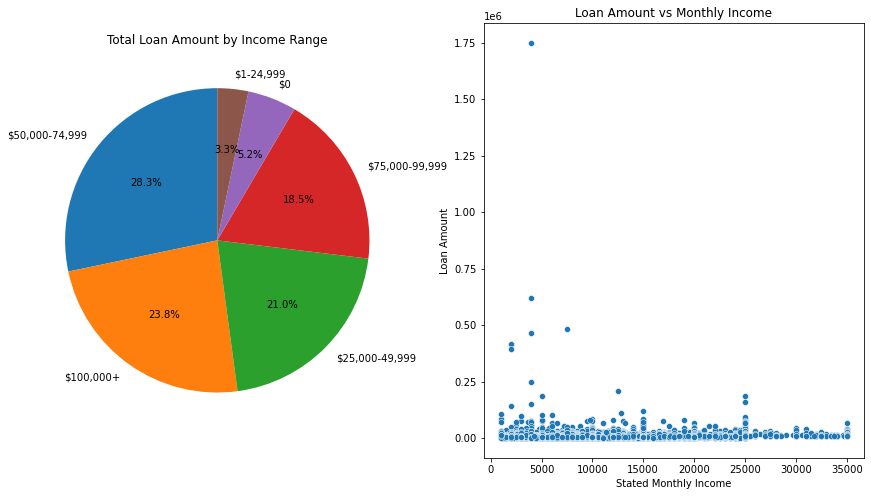

In [34]:
import matplotlib.pyplot as plt
import seaborn as sb

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[15,8])

# Subplot 1: Create a pie chart of total loan amount by income range
loan_totals = clean_loan.groupby('IncomeRange')['LoanOriginalAmount'].sum().reset_index().sort_values('LoanOriginalAmount', ascending=False)
ax1.pie(loan_totals['LoanOriginalAmount'], labels=loan_totals['IncomeRange'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Total Loan Amount by Income Range')

# Subplot 2: Create a scatterplot of loan amount vs. stated monthly income
sb.scatterplot(data=clean_loan, x="LoanOriginalAmount", y="StatedMonthlyIncome", ax=ax2)
ax2.set_title("Loan Amount vs Monthly Income")
ax2.set_xlabel("Stated Monthly Income")
ax2.set_ylabel("Loan Amount")

# Show the plot
plt.show()


Based on the analysis, the income range from 50K to 75K stands out as the leader in terms of loan amount, followed by three other income ranges with small differences between each other. There is a marginal increase of 2-3% from 23.8% for the income range above 100K, to 21% for the range from 25K-50K, and 18.5% for the range from 75K-100K. The lowest proportion of loan amounts are associated with the income range of 0 and 1-25K. These findings suggest that income range is a significant factor in determining loan amounts, and lenders could use this information to inform their lending policies and practices.

### How does the borrower's employment status relate to their APR for loans

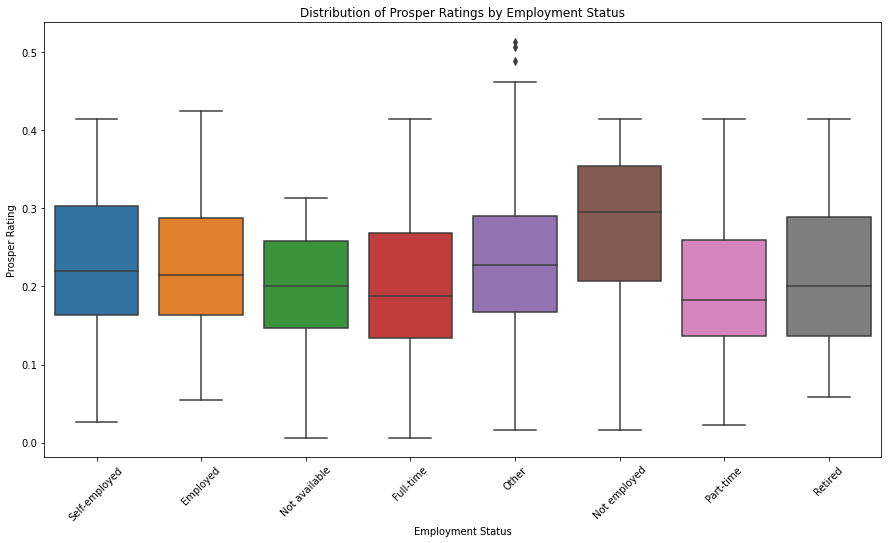

In [35]:
# Set the plot size
plt.figure(figsize=(15,8))

# Create the box plot
sb.boxplot(data=clean_loan, x='EmploymentStatus', y='BorrowerAPR')

# Set the x-axis label and rotate the tick labels
plt.xlabel('Employment Status')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Prosper Rating')

# Add a title
plt.title('Distribution of Prosper Ratings by Employment Status')

# Show the plot
plt.show()


Based on the information provided, we can conclude that there is a noticeable difference in the distribution of Prosper ratings based on the employment status of borrowers. Not-employed borrowers tend to have the highest median rating, while the ratings for other employment statuses are relatively similar. Additionally, the spread of the box and the size of the whiskers varies depending on the employment status. The 'other' group, for example, has the largest spread and a few outliers, while the 'not available' group has the smallest spread and a higher median rating. The shape of the distribution of Prosper ratings is generally similar across employment statuses, with similar beginning values, but notable differences in the range of the box and whiskers. The retired and not-employed groups have the largest box ranges, indicating greater variability in Prosper ratings, while the 'not available' group has the smallest box range. Overall, this suggests that employment status may be a significant factor in predicting Prosper ratings for borrowers.

### What is the most common 'LoanStatus' and 'ListingCategory' in the dataset

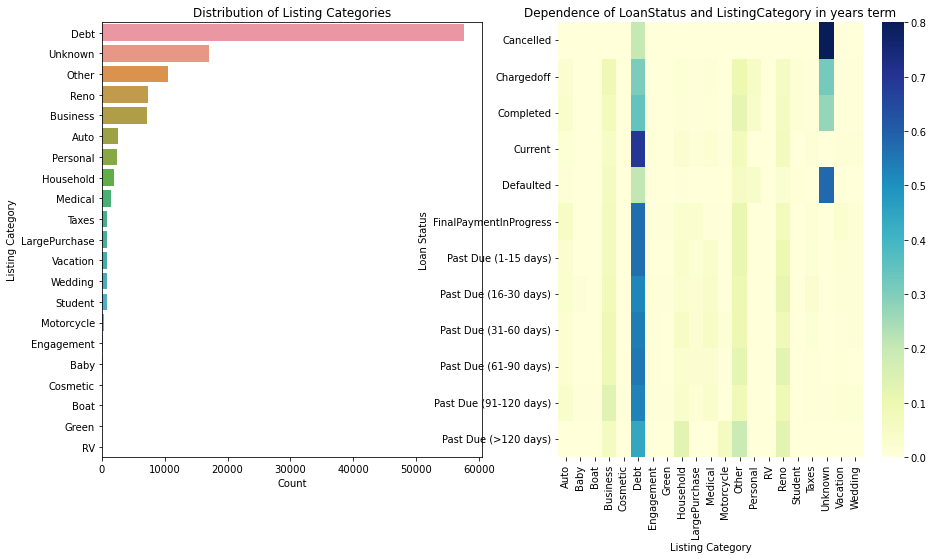

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[15,8])

# Subplot 1: Create a countplot of the distribution of listing categories
subset_data = clean_loan[['LoanStatus', 'ListingCategory']].dropna()
category_counts = subset_data['ListingCategory'].value_counts().sort_values(ascending=False)
sb.countplot(data=subset_data, y='ListingCategory', order=category_counts.index, ax=ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Listing Category')
ax1.set_title('Distribution of Listing Categories')

# Subplot 2: Create a heatmap of the dependence of LoanStatus and ListingCategory in years term
loan_status_category = pd.crosstab(clean_loan['LoanStatus'], clean_loan['ListingCategory'], 
            values=clean_loan['Year'], aggfunc='count', normalize='index')
sb.heatmap(loan_status_category, cmap='YlGnBu', ax=ax2)
ax2.set_title('Dependence of LoanStatus and ListingCategory in years term')
ax2.set_xlabel('Listing Category')
ax2.set_ylabel('Loan Status')

# Show the plot
plt.show()


Based on the graphical representation, it can be inferred that the listing category "Debt Consolidation" has the highest frequency, with a corresponding loan amount of approximately 60000. On the other hand, the listing category "RV" has the lowest frequency, indicating that it is the least common among the observed categories. 
The heatmap analysis shows that 'Debt Consolidation' had a higher proportion of loans across all the years, with current loan status being the most common and defaulted status being the least frequent. 'Cancelled' status in the 'Unknown' category was the most frequently visualized, and loan statuses with past due from 15 days were less distributed. 'Student', 'Baby', 'Boat', and 'RV' categories did not experience significant shifts in the distribution of loan statuses over the years. These insights provide valuable information for further analysis and business decisions in the lending industry.

# Main insights

>California has the highest loan amount, followed by Texas and New York, while North Dakota has the lowest loan amount.

>The Borrower APR has a multimodal distribution, suggesting that multiple factors affect APR, with a sharp peak around 0.35 indicating a threshold effect for certain borrower characteristics.

>Higher ratings result in higher loan amounts across all three terms, and lenders are more willing to lend to borrowers with better creditworthiness. HR proper rating only has 36-month terms, while others have all three terms.

>Borrowers who choose a shorter loan term may pay a lower monthly payment, but they will need to make more payments overall. Lenders may offer longer loan terms to borrowers with better creditworthiness as they are more likely to make timely payments.

>'Debt Consolidation' had a higher proportion of loans across all years, with current loan status being the most common and defaulted status being the least frequent. This information could be useful for lenders in making informed decisions regarding lending policies.

>The income range from 50K to 75K is the leader in loan amounts, suggesting that income range is a significant factor in determining loan amounts.

>Different loan statuses have different distributions of loan amounts. 'Cancelled' status indicates a decrease in the range of loan amounts, while 'current' status displays an unsymmetrical structure with three peaks at 5000, 10000, and 15000. These insights could be used by lenders to develop more targeted lending policies based on loan status.